In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [5]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [6]:
y.shape, tx.shape

((10000,), (10000, 2))

# Computing the Cost Function
Fill in the the `compute_cost` function below:

In [14]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE / MAE
    # ***************************************************

    e = y - np.dot(tx, w)
    N = len(y)
    
    L = 1/(2*N)*np.dot(np.transpose(e),e)
    return L 

# TEST
w = [1, 2]
cost = compute_loss(y, tx, w)
print("The cost is %s"%cost)

The cost is 2694.48336589


# Grid Search

Fill in the function `grid_search()` below:

In [15]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i in range(len(w0)):
        for j in range(len(w1)):
            losses[i,j] = compute_loss(y, tx, [w0[i], w1[j]])
    
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=15.558703368609525, w0*=72.72727272727272, w1*=13.636363636363626, execution time=0.427 seconds


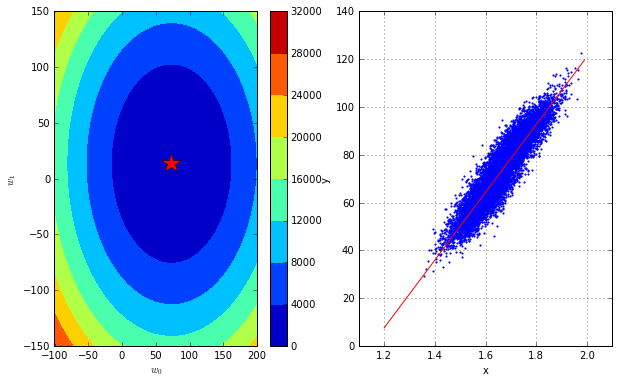

In [17]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization
import datetime

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [18]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
    N = len(y)
    e = y - np.dot(tx, w)
    grad = -1/N*np.dot(np.transpose(tx), e)
    
    return grad

In [19]:
w = [100, 20]
print(np.linalg.norm(compute_gradient(y,tx,w)))
w = [50, 10]
print(np.linalg.norm(compute_gradient(y,tx,w)))

27.4905211293
23.5523926782


Please fill in the functions `gradient_descent` below:

In [22]:
def gradient_descent(y, tx, initial_w, max_iters, gamma): 
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        # raise NotImplementedError
        
        loss = compute_loss(y, tx, w)
        grad = compute_gradient(y, tx, w)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        # raise NotImplementedError
        
        w = w - gamma * grad
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [23]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.4

# Initialization
w_initial = np.array([0.0, 0.0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.236712759168, w0=29.317568800842068, w1=5.3918849739955865
Gradient Descent(1/49): loss=1015.0521848293517, w0=46.9081100813473, w1=8.627015958392954
Gradient Descent(2/49): loss=375.26575477461796, w0=57.46243484965046, w1=10.568094549031379
Gradient Descent(3/49): loss=144.9426399549133, w0=63.79502971063235, w1=11.73274170341444
Gradient Descent(4/49): loss=62.02631861981962, w0=67.59458662722149, w1=12.43152999604428
Gradient Descent(5/49): loss=32.17644293918587, w0=69.87432077717497, w1=12.850802971622185
Gradient Descent(6/49): loss=21.43048769415771, w0=71.24216126714705, w1=13.102366756968928
Gradient Descent(7/49): loss=17.56194380594761, w0=72.06286556113031, w1=13.253305028176975
Gradient Descent(8/49): loss=16.16926800619195, w0=72.55528813752026, w1=13.343867990901805
Gradient Descent(9/49): loss=15.667904718279916, w0=72.85074168335423, w1=13.398205768536702
Gradient Descent(10/49): loss=15.487413934631583, w0=73.02801381085462, w1=13.43

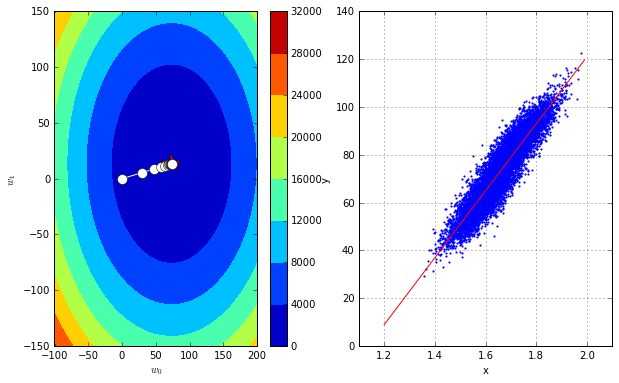

In [24]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# Stochastic gradient descent

In [36]:
def compute_stoch_gradient(y, tx, w, batch_size):
    """Compute a stochastic gradient for batch data."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.
    # ***************************************************
    #raise NotImplementedError
    
    stoch_grad = np.array([0,0])
 
    for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
        stoch_grad = stoch_grad + compute_gradient(minibatch_y, minibatch_tx, w)
        
    return 1/batch_size * stoch_grad

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_epochs, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    #raise NotImplementedError
    
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_epochs):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        #raise NotImplementedError
        
        loss = compute_loss(y, tx, w)
        grad = compute_stoch_gradient(y, tx, w, batch_size)
        print(grad)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        #raise NotImplementedError
        
        w = w - gamma * grad
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws    

In [40]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 30

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

[-816.14479846 -150.58633838]
Gradient Descent(0/49): loss=2792.236712759168, w0=81.61447984603781, w1=15.058633838078132
[ 92.67801662  17.54548342]
Gradient Descent(1/49): loss=51.2482256845101, w0=72.34667818400918, w1=13.304085496029106
[-10.52076605  -1.91917755]
Gradient Descent(2/49): loss=15.849945705134175, w0=73.39875478914477, w1=13.496003250746654
[ 1.21407245  0.16069133]
Gradient Descent(3/49): loss=15.391515520787667, w0=73.2773475437744, w1=13.479934117385689
[-0.22727287 -0.05722349]
Gradient Descent(4/49): loss=15.386025249735418, w0=73.30007483043536, w1=13.485656465951811
[ 0.0324566   0.08175264]
Gradient Descent(5/49): loss=15.38592446322968, w0=73.29682917093021, w1=13.477481201526585
[ 0.08450991 -0.02679798]
Gradient Descent(6/49): loss=15.385894583846074, w0=73.28837817960783, w1=13.480160999184996
[-0.03816372 -0.01649311]
Gradient Descent(7/49): loss=15.385903336418258, w0=73.29219455180817, w1=13.481810310549827
[ 0.00833223 -0.02499164]
Gradient Descent(8/

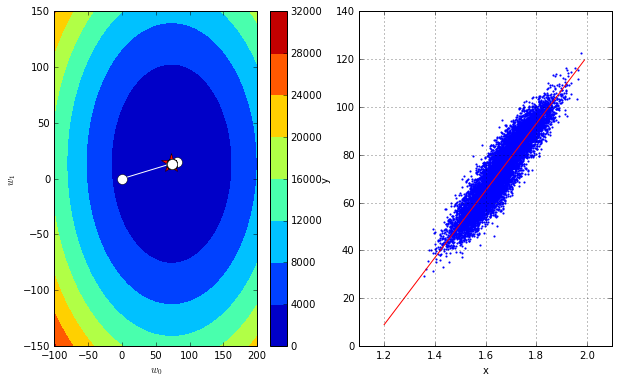

In [41]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))